In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

## Importing dataset

In [51]:
df = pd.read_csv('Groceries_dataset.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


## Converting Date datatype to dateDtype from object Dtype 

In [54]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


## Data Exploration 

In [61]:
item_counts = df.itemDescription.value_counts().sort_values(ascending = False)[:10]
item_counts

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

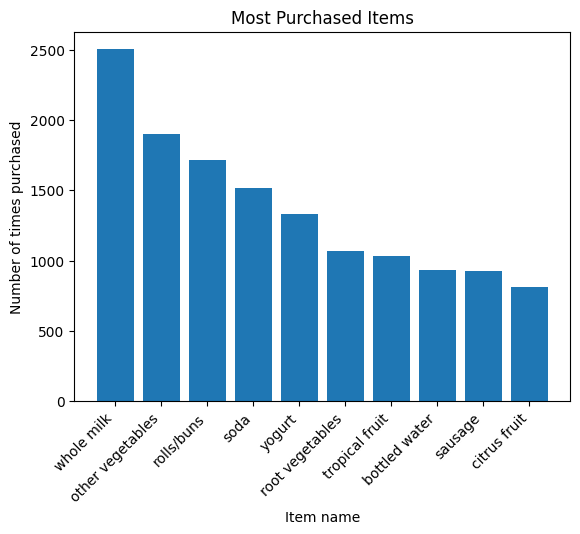

In [71]:
plt.bar(item_counts.index, item_counts)
plt.xlabel('Item name')  # Fixed the typo here
plt.ylabel('Number of times purchased')
plt.xticks(rotation=45, ha='right')
plt.title('Most Purchased Items')
plt.show()

## Apriori Algorithm 

##### The Apriori algorithm is a data mining technique used to find frequent itemsets in large datasets. It helps identify associations between items that are often bought together, like bread and butter.

#### 1. support = freq(A,B)/N (where A and B = Total Products and N = Total Transactions)

#### 2. Confidence = freq(A,B)/ freq(A)

#### 3.Lift = Support / Support(A) * Support(B)

In [72]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [73]:
df

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk
...,...,...,...
38760,4471,2014-10-08,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-12-03,fruit/vegetable juice


In [75]:
df['Quantity'] = 1
df

,Member_number,Date,itemDescription,Quantity
0,1808,2015-07-21,tropical fruit,1
1,2552,2015-01-05,whole milk,1
2,2300,2015-09-19,pip fruit,1
3,1187,2015-12-12,other vegetables,1
4,3037,2015-02-01,whole milk,1
...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,1
38761,2022,2014-02-23,candy,1
38762,1097,2014-04-16,cake bar,1
38763,1510,2014-12-03,fruit/vegetable juice,1


In [92]:
transactions = (df.groupby(['Member_number', 'itemDescription'])['Quantity'].sum().unstack(fill_value=0).reset_index().set_index('Member_number'))


transactions

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
def encode(x):
    if x<=0:
        return 0
    elif x>=0:
        return 1
data = transactions.apply(lambda col: col.map(encode))

In [84]:
data

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
from mlxtend.frequent_patterns import apriori, association_rules


data = data.astype(bool)
frequent_itemset = apriori(data, min_support=0.06, use_colnames=True)
num_itemsets = frequent_itemset.shape[0]
rules = association_rules(frequent_itemset, metric='lift', min_threshold=1, num_itemsets=num_itemsets)

In [88]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,1.0,0.009360,1.023754,0.269364,0.124875,0.023203,0.338229
1,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
2,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,1.0,0.008692,1.096257,0.150857,0.146703,0.087805,0.306610
3,(other vegetables),(bottled beer),0.376603,0.158799,0.068497,0.181880,1.145345,1.0,0.008692,1.028212,0.203563,0.146703,0.027438,0.306610
4,(bottled beer),(rolls/buns),0.158799,0.349666,0.063109,0.397415,1.136555,1.0,0.007582,1.079240,0.142829,0.141705,0.073422,0.288950


In [94]:
rules[(rules['confidence'] > 0.4) & (rules['lift'] > 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
2,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,1.0,0.008692,1.096257,0.150857,0.146703,0.087805,0.306610
7,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,1.0,0.012669,1.172672,0.176297,0.160714,0.147247,0.362207
8,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,1.0,0.013414,1.111969,0.181695,0.189147,0.100694,0.344347
15,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,1.0,0.014452,1.142615,0.163569,0.200825,0.124815,0.385526
19,(brown bread),(whole milk),0.135967,0.458184,0.069779,0.513208,1.120091,1.0,0.007481,1.113034,0.124087,0.133072,0.101554,0.332752
21,(butter),(whole milk),0.126475,0.458184,0.066188,0.523327,1.142176,1.0,0.008239,1.136661,0.142501,0.127660,0.120231,0.333892
22,(canned beer),(other vegetables),0.165213,0.376603,0.067214,0.406832,1.080267,1.0,0.004994,1.050962,0.089008,0.141622,0.048491,0.292653
24,(canned beer),(rolls/buns),0.165213,0.349666,0.066701,0.403727,1.154605,1.0,0.008931,1.090663,0.160404,0.148827,0.083127,0.297241
27,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,1.0,0.011526,1.147795,0.158299,0.162679,0.128764,0.359160


In [111]:
top_rules['item_pair'] = top_rules['antecedents'].astype(str) + ' + ' + top_rules['consequents'].astype(str)
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,item_pair
144,(yogurt),"(whole milk, other vegetables)",0.282966,0.191380,0.071832,0.253853,1.326434,1.0,0.017678,1.083727,0.343217,0.178458,0.077259,0.314594,frozenset({'yogurt'}) + frozenset({'whole milk...
141,"(whole milk, other vegetables)",(yogurt),0.191380,0.282966,0.071832,0.375335,1.326434,1.0,0.017678,1.147870,0.304344,0.178458,0.128822,0.314594,"frozenset({'whole milk', 'other vegetables'}) ..."
153,"(whole milk, rolls/buns)",(yogurt),0.178553,0.282966,0.065931,0.369253,1.304939,1.0,0.015407,1.136802,0.284474,0.166667,0.120339,0.301127,"frozenset({'whole milk', 'rolls/buns'}) + froz..."
156,(yogurt),"(whole milk, rolls/buns)",0.282966,0.178553,0.065931,0.233001,1.304939,1.0,0.015407,1.070988,0.325899,0.166667,0.066283,0.301127,frozenset({'yogurt'}) + frozenset({'whole milk...
143,(whole milk),"(yogurt, other vegetables)",0.458184,0.120318,0.071832,0.156775,1.303003,1.0,0.016704,1.043235,0.429190,0.141772,0.041443,0.376895,frozenset({'whole milk'}) + frozenset({'yogurt...


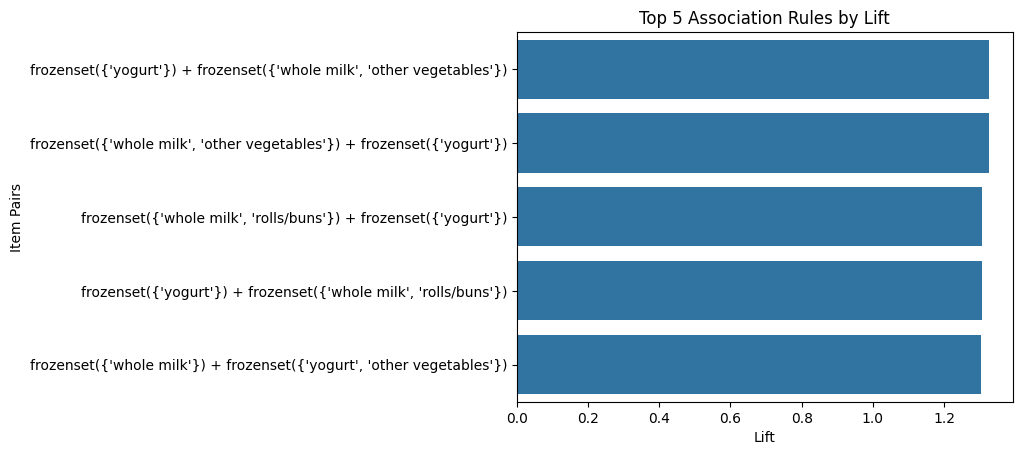

In [110]:


plt.figure
sns.barplot(x='lift', y=top_rules['item_pair'], data=top_rules)
plt.xlabel('Lift')
plt.ylabel('Item Pairs')
plt.title('Top 5 Association Rules by Lift')
plt.show()